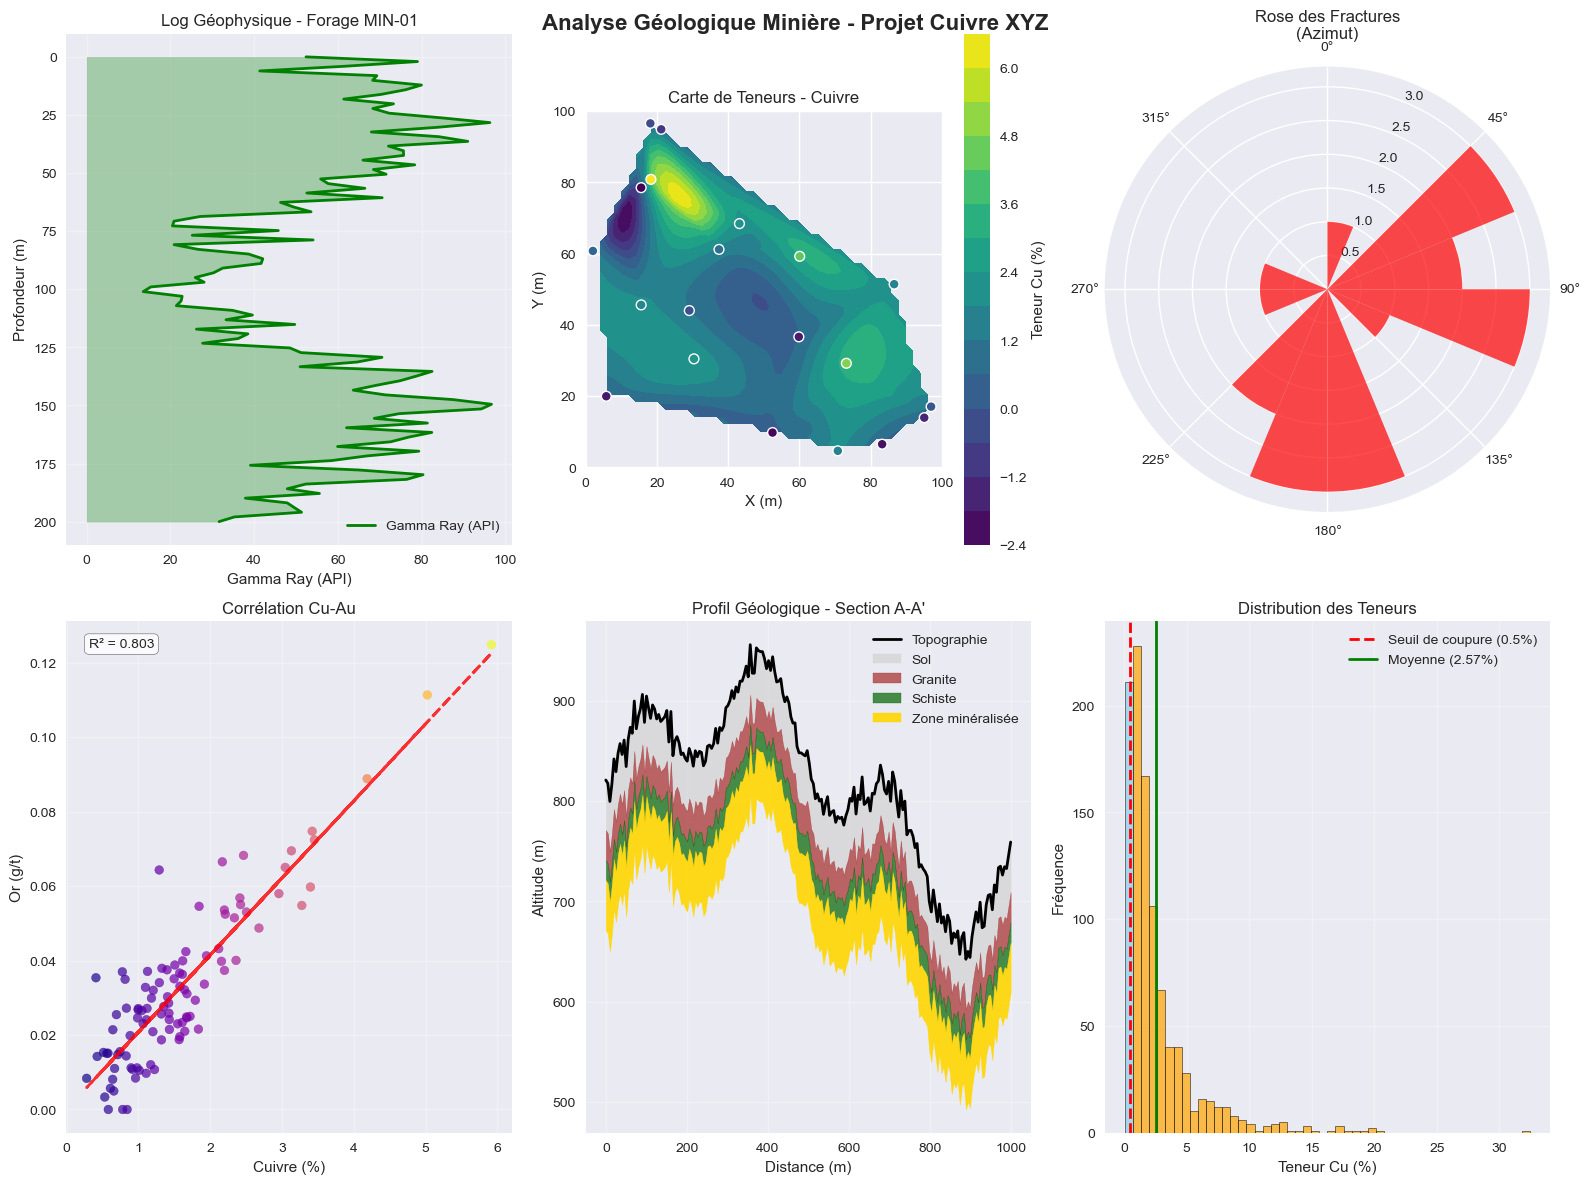

=== RÉSUMÉ STATISTIQUE ===
Nombre de sondages analysés: 20
Teneur moyenne Cu : 1.55%
Teneur médiane Cu : 1.40%
Tonnage au-dessus seuil : 875 échantillons
Corrélation Cu-Au : 0.896
Direction principale fractures : 139°
                                                                           Mamadou DIAKHABY - Data Engineer | Pipelines ETL/ELT | Pour vos projets data


In [ ]:
# Mamadou DIAKHABY - Data Engineer | Pipelines ETL/ELT | Pour vos projets data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle
from scipy.interpolate import griddata
import seaborn as sns

#  Visualisation de données géologiques avec Python

# Configuration générale des graphiques
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(16, 12))

# === 1. LOG GÉOPHYSIQUE D'UN FORAGE ===
ax1 = plt.subplot(2, 3, 1)

# Données simulées d'un log de forage
profondeur = np.linspace(0, 200, 100)
gamma_ray = 50 + 30 * np.sin(profondeur/20) + 10 * np.random.randn(100)
resistivite = 10 + 15 * np.exp(-profondeur/100) + 5 * np.random.randn(100)

# Tracé du log gamma ray
ax1.plot(gamma_ray, profondeur, 'g-', linewidth=2, label='Gamma Ray (API)')
ax1.fill_betweenx(profondeur, 0, gamma_ray, alpha=0.3, color='green')
ax1.set_ylabel('Profondeur (m)')
ax1.set_xlabel('Gamma Ray (API)')
ax1.set_title('Log Géophysique - Forage MIN-01')
ax1.invert_yaxis()  # Profondeur croissante vers le bas
ax1.grid(True, alpha=0.3)
ax1.legend()

# === 2. CARTE DE TENEURS (KRIGEAGE) ===
ax2 = plt.subplot(2, 3, 2)

# Points de sondage simulés
np.random.seed(42)
x_drill = np.random.uniform(0, 100, 20)
y_drill = np.random.uniform(0, 100, 20)
teneurs_cu = np.random.lognormal(0.5, 0.8, 20)  # Teneurs en cuivre (%)

# Grille d'interpolation
xi = np.linspace(0, 100, 50)
yi = np.linspace(0, 100, 50)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolation par krigeage (simulation)
Zi = griddata((x_drill, y_drill), teneurs_cu, (Xi, Yi), method='cubic')

# Carte de contours
contour = ax2.contourf(Xi, Yi, Zi, levels=15, cmap='viridis')
ax2.scatter(x_drill, y_drill, c=teneurs_cu, s=50, cmap='viridis', 
           edgecolors='white', linewidth=1, label='Sondages')

# Colorbar
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Teneur Cu (%)')

ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('Carte de Teneurs - Cuivre')
ax2.set_aspect('equal')

# === 3. DIAGRAMME ROSE DES FRACTURES ===
ax3 = plt.subplot(2, 3, 3, projection='polar')

# Données d'orientation des fractures
orientations = np.array([15, 45, 50, 65, 70, 85, 90, 105, 110, 125, 
                        160, 165, 175, 180, 195, 200, 205, 220, 250, 270])
orientations_rad = np.deg2rad(orientations)

# Histogramme polaire
n_bins = 16
hist, bin_edges = np.histogram(orientations, bins=n_bins, range=(0, 360))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers_rad = np.deg2rad(bin_centers)

bars = ax3.bar(bin_centers_rad, hist, width=2*np.pi/n_bins, alpha=0.7, color='red')
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
ax3.set_title('Rose des Fractures\n(Azimut)', pad=20)
ax3.set_ylim(0, max(hist) * 1.1)

#Mamadou DIAKHABY - Data Engineer | Pipelines ETL/ELT | Pour vos projets data
# === 4. CORRÉLATION GÉOCHIMIQUE ===
ax4 = plt.subplot(2, 3, 4)

# Données géochimiques simulées
n_samples = 100
cu_content = np.random.lognormal(0.3, 0.6, n_samples)
au_content = cu_content * 0.02 + np.random.normal(0, 0.01, n_samples)
au_content = np.maximum(au_content, 0)  # Pas de valeurs négatives

# Scatter plot avec densité
scatter = ax4.scatter(cu_content, au_content, c=cu_content, 
                     cmap='plasma', alpha=0.7, s=40)

# Ligne de tendance
z = np.polyfit(cu_content, au_content, 1)
p = np.poly1d(z)
ax4.plot(cu_content, p(cu_content), "r--", alpha=0.8, linewidth=2)

# Corrélation
correlation = np.corrcoef(cu_content, au_content)[0, 1]
ax4.text(0.05, 0.95, f'R² = {correlation**2:.3f}', transform=ax4.transAxes, 
         bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

ax4.set_xlabel('Cuivre (%)')
ax4.set_ylabel('Or (g/t)')
ax4.set_title('Corrélation Cu-Au')
ax4.grid(True, alpha=0.3)

# === 5. PROFIL TOPOGRAPHIQUE ===
ax5 = plt.subplot(2, 3, 5)

# Profil topographique avec géologie
distance = np.linspace(0, 1000, 200)
elevation = 800 + 100 * np.sin(distance/200) + 50 * np.sin(distance/50) + \
           10 * np.random.randn(200)

# Géologie simplifiée
granite = elevation - 50
schiste = granite - 30
mineralisation = schiste - 20

ax5.plot(distance, elevation, 'k-', linewidth=2, label='Topographie')
ax5.fill_between(distance, elevation, granite, alpha=0.7, color='lightgray', label='Sol')
ax5.fill_between(distance, granite, schiste, alpha=0.7, color='brown', label='Granite')
ax5.fill_between(distance, schiste, mineralisation, alpha=0.7, color='darkgreen', label='Schiste')
ax5.fill_between(distance, mineralisation, mineralisation-50, alpha=0.9, color='gold', label='Zone minéralisée')

ax5.set_xlabel('Distance (m)')
ax5.set_ylabel('Altitude (m)')
ax5.set_title('Profil Géologique - Section A-A\'')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)

# === 6. HISTOGRAMME DES TENEURS ===
ax6 = plt.subplot(2, 3, 6)

# Distribution des teneurs avec seuil de coupure
teneurs_all = np.random.lognormal(0.4, 1.0, 1000)
seuil_coupure = 0.5  # Seuil économique

# Histogramme
n, bins, patches = ax6.hist(teneurs_all, bins=50, alpha=0.7, color='skyblue', 
                           edgecolor='black', linewidth=0.5)

# Colorer les barres au-dessus du seuil
for i, (patch, bin_val) in enumerate(zip(patches, bins[:-1])):
    if bin_val >= seuil_coupure:
        patch.set_facecolor('orange')

# Ligne de seuil de coupure
ax6.axvline(seuil_coupure, color='red', linestyle='--', linewidth=2, 
           label=f'Seuil de coupure ({seuil_coupure}%)')

# Statistiques
moyenne = np.mean(teneurs_all)
ax6.axvline(moyenne, color='green', linestyle='-', linewidth=2, 
           label=f'Moyenne ({moyenne:.2f}%)')

ax6.set_xlabel('Teneur Cu (%)')
ax6.set_ylabel('Fréquence')
ax6.set_title('Distribution des Teneurs')
ax6.legend()
ax6.grid(True, alpha=0.3)

# === FINALISATION ===
plt.tight_layout()
plt.suptitle('Analyse Géologique Minière - Projet Cuivre XYZ', 
             fontsize=16, y=0.98, fontweight='bold')

# Affichage
plt.show()

# === STATISTIQUES RÉSUMÉES ====
print("=== RÉSUMÉ STATISTIQUE ===")
print(f"Nombre de sondages analysés: {len(x_drill)}")
print(f"Teneur moyenne Cu : {np.mean(teneurs_cu):.2f}%")
print(f"Teneur médiane Cu : {np.median(teneurs_cu):.2f}%")
print(f"Tonnage au-dessus seuil : {(teneurs_all >= seuil_coupure).sum()} échantillons")
print(f"Corrélation Cu-Au : {correlation :.3f}")
print(f"Direction principale fractures : {np.mean(orientations):.0f}°")
print(f"{' '*75}\033[1mMamadou DIAKHABY - Data Engineer | Pipelines ETL/ELT | Pour vos projets data\033[0m")